In [1]:
# !pip install pygad

In [1]:
import numpy 
import pandas

# Example with geneticalgorithm

In [2]:
# !pip install geneticalgorithm

# geneticalgorithm Example - 1

 The best solution found:                                                                           
 [1. 1. 0.]

 Objective function:
 2.0


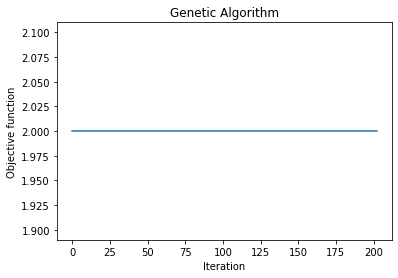

In [3]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    penalty = 0
    if X[0]+X[1]<2:
        penalty=500+1000*(2-X[0]-X[1])
    return np.sum(X)+penalty


varbound=np.array([[0,10]]*3)

model=ga(function=f,dimension=3,variable_type='int',variable_boundaries=varbound, 
         algorithm_parameters={'max_num_iteration': 500,\
                                       'population_size':100,\
                                       'mutation_probability':0.1,\
                                       'elit_ratio': 0.01,\
                                       'crossover_probability': 0.5,\
                                       'parents_portion': 0.3,\
                                       'crossover_type':'uniform',\
                                       'max_iteration_without_improv':200})

model.run()

# geneticalgorithm Example - 2

 The best solution found:                                                                           
 [0.50093695 1.         0.        ]

 Objective function:
 1.500936945376881


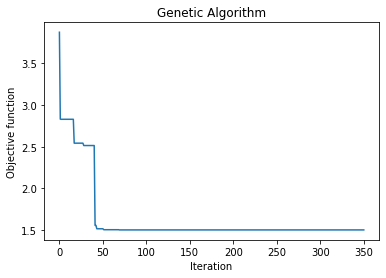

In [4]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    return np.sum(X)

varbound=np.array([[0.5,1.5],[1,100],[0,1]])
vartype=np.array([['real'],['int'],['int']])
model=ga(function=f,dimension=3,variable_type_mixed=vartype,variable_boundaries=varbound)

model.run()

# GA with pymoo

In [9]:
# !pip install pymoo

In [39]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize

problem = get_problem("g01")
print(problem)

algorithm = GA(
    pop_size=100,
    eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

# name: G1
# n_var: 13
# n_obj: 1
# n_constr: 9

Best solution found: 
X = [1.         0.99999999 1.         0.99999998 0.99999996 1.
 0.99999992 0.99999999 1.         2.99906987 2.99525757 2.98473236
 0.99999999]
F = [-14.97905952]


# Pymoo with own input

In [94]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize
import numpy as np
import pandas as pd
import autograd.numpy as anp
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [95]:
class MyProblem1(Problem):

    def __init__(self):
        super().__init__(n_var=100,
                         n_obj=3,
                         n_constr=0,
                         xl=anp.array([-1]*100),
                         xu=anp.array([2]*100))
  
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 1 - np.exp(-((x - 1 / np.sqrt(self.n_var)) ** 2).sum(axis=1))
        f2 = 1 - np.exp(-((x + 1 / np.sqrt(self.n_var)) ** 2).sum(axis=1))
        out["F"] = np.column_stack([f1, f2])
        out["G"] = np.column_stack([f1, f2])

In [112]:
class MyProblem3(Problem):

    def __init__(self):
        super().__init__(n_var=2, n_obj=1, n_constr=1, xl=0, xu=10)

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = - np.min(x * [3, 1], axis=1)
        out["G"] = x[:, 0] + x[:, 1] - 10

### NSGA2 Example in  pymoo

In [99]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize

print("MyProblem11111111111111111111111111111111()")
print(MyProblem1())

algorithm = NSGA2(
    pop_size=1,
    eliminate_duplicates=True)

res = minimize(MyProblem1(),
               algorithm,
               seed=200,
               verbose=False)

print("Best solution found: %s" % res.X)
print("Function value: %s" % res.F)
print("Constraint violation: %s" % res.CV)

MyProblem11111111111111111111111111111111()
# name: MyProblem1
# n_var: 100
# n_obj: 3
# n_constr: 0

Best solution found: [[ 1.84289677e+00 -1.38008450e-01  7.83260433e-01  2.84926055e-01
   1.29242206e+00 -9.91418225e-01  7.22710439e-02  1.76409240e+00
   3.68242956e-01  1.94540813e+00  1.97664449e+00  1.95808253e+00
   1.76980012e+00 -9.79218863e-02  1.53831047e+00 -6.36334095e-01
   1.35672886e+00 -2.48484836e-01 -7.11910870e-01  1.83047311e+00
   1.39030600e+00  1.01759444e+00  1.51055452e+00  7.35127070e-01
   3.50253513e-01  1.04047094e+00  2.58276864e-01  9.21180393e-01
   8.25968876e-01 -6.83697678e-01  1.73881234e+00  1.27610124e+00
   1.03892550e+00 -1.19556886e-02 -9.20635351e-01  1.41098116e+00
   1.91848757e+00 -1.51185656e-01  9.47224019e-01 -4.65981155e-02
  -4.36932574e-01  2.57143620e-01  9.97996703e-01  6.61862821e-01
   1.56347756e+00 -4.86966074e-01  1.93447555e+00 -9.62088290e-02
  -3.02652718e-01  1.45161499e+00  1.83443184e+00  1.96189560e+00
  -9.51809169e-01 -

In [113]:
import numpy as np

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.factory import get_crossover, get_mutation, get_sampling
from pymoo.optimize import minimize

problem = MyProblem3()

algorithm = GA(
    pop_size=1,
    eliminate_duplicates=True,
)

res = minimize(
    problem,
    algorithm,
    ('n_gen', 200),
    seed=1,
    save_history=True
)

print("Best solution found: %s" % res.X)
print("Function value: %s" % res.F)
print("Constraint violation: %s" % res.CV)

Best solution found: [2.65683499 7.33397018]
Function value: [-7.33397018]
Constraint violation: [0.]


In [243]:
pcs = df["power_x"].tolist()
pvs = df["power_x"].tolist()
class MyProblemWithBattery(Problem):
    def __init__(self):
        super().__init__(n_var=len(df)*2,
                         n_obj=1,
                         n_constr=0,
                         xl=anp.array([-1]*len(df)*2),
                         xu=anp.array([2]*len(df)*2))

    def _evaluate(self, x, out, *args, **kwargs):
        var_length = len(x)//2
        purchase = np.array(x[:var_length])
        battery = np.array(x[var_length:])
        remaining_battery_power = 0
        cost = 0
        for pu,ba,pc,pv in zip(purchase, battery,pcs,pvs):
            if pv > pc:
                diff = pv-pc
                remaining_battery_power += diff
                cost -= diff
            else:
                diff = pv+pu-pc
                if diff >= remaining_battery_power:
                    cost += pu**4
                else:
                    cost += abs(diff**3)
        f1 = 1 - np.exp(-((x - 1 / np.sqrt(self.n_var)) ** 2).sum(axis=1))
        f2 = 1 - np.exp(-((x + 1 / np.sqrt(self.n_var)) ** 2).sum(axis=1))
        out["F"] = np.column_stack([cost-1, cost+1])

In [244]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize

print("MyProblemWithBattery.................................")
print(MyProblemWithBattery())

# if we set pop size 1 then in f(x) x will be [[ n var ]] but if we increase pop size 2 then x will be [[ n var ],[ n var ] ]
# so we got in fitness function as per logic.
algorithm = NSGA2(
    pop_size=1,
    eliminate_duplicates=True)

import time
start_time = time.time()
res = minimize(MyProblemWithBattery(),
               algorithm,
               ('n_gen', 100),
               seed=200,
               verbose=False)

print("--- %s seconds ---" % (time.time() - start_time))
print("Best solution found: %s" % res.X)
print("length of Best solution found: %s" % len(res.X))
print("Function value: %s" % res.F)
print("Constraint violation: %s" % res.CV)

MyProblemWithBattery.................................
# name: MyProblemWithBattery
# n_var: 1926
# n_obj: 1
# n_constr: 0

--- 0.2657449245452881 seconds ---
Best solution found: [ 1.84289677 -0.32035774  0.78326043 ...  0.75348859  1.46080962
  0.63103988]
length of Best solution found: 1926
Function value: [-1.  1.]
Constraint violation: [0.]


# multi objective .....pymoo 

In [239]:
pcs = df["power_x"].tolist()
pvs = df["power_x"].tolist()
class MyProblemWithBatterymulti(Problem):
    def __init__(self):
        super().__init__(n_var=len(df)*2,
                         n_obj=1,
                         n_constr=0,
                         xl=anp.array([-1]*len(df)*2),
                         xu=anp.array([2]*len(df)*2))

    def _evaluate(self, X, out, *args, **kwargs):
        print(X)
        print(len(X))
        cost = 0
        for x in X:
            var_length = len(x)//2
            purchase = np.array(x[:var_length])
            battery = np.array(x[var_length:])
            remaining_battery_power = 0
            cost = 0
            for pu,ba,pc,pv in zip(purchase, battery,pcs,pvs):
                if pv > pc:
                    diff = pv-pc
                    remaining_battery_power += diff
                    cost -= diff
                else:
                    diff = pv+pu-pc
                    if diff >= remaining_battery_power:
                        cost += pu**4
                    else:
                        cost += abs(diff**3)
        out["F"] = np.column_stack([cost-1, cost+1])
        out["G"] = np.column_stack([cost-1, cost+1])

In [240]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize

print("MyProblemWithBattery.................................")
print(MyProblemWithBattery())

# if we set pop size 1 then in f(x) x will be [[ n var ]] but if we increase pop size 2 then x will be [[ n var ],[ n var ] ]
# so we got in fitness function as per logic.
algorithm = NSGA2(
    pop_size=1,
    eliminate_duplicates=True)

import time
start_time = time.time()
res = minimize(MyProblemWithBatterymulti(),
               algorithm,
                ('n_gen', 100),
               seed=1,
               verbose=False)

print("--- %s seconds ---" % (time.time() - start_time))

print("Best solution found: %s" % res.X)
for x in res.X:
    print(len(x) )
print("Function value: %s" % res.F)
print("Constraint violation: %s" % res.CV)

MyProblemWithBattery.................................
# name: MyProblemWithBattery
# n_var: 1926
# n_obj: 2
# n_constr: 0

[[ 0.25106601  1.16097348 -0.99965688 ...  0.41089677  1.04809413
  -0.95974507]]
1
[[ 0.25106601  1.16097348 -0.99965688 ...  0.41089677  1.04809413
  -0.95974507]]
1
[[ 0.25106601  1.16097348 -0.99965688 ...  0.41089677  1.04809413
  -0.95974507]]
1
[[ 0.25106601  1.16097348 -0.99965688 ...  0.41089677  1.04809413
  -0.95974507]]
1
[[ 0.25106601  1.16097348 -0.99965688 ...  0.41089677  1.04809413
  -0.95974507]]
1
[[ 0.25106601  1.16097348 -0.99965688 ...  0.41089677  1.04809413
  -0.95974507]]
1
[[ 0.25106601  1.16097348 -0.99965688 ...  0.41089677  1.04809413
  -0.95974507]]
1
[[ 0.25106601  1.16097348 -0.99965688 ...  0.41089677  1.04809413
  -0.95974507]]
1
[[ 0.25106601  1.16097348 -0.99965688 ...  0.41089677  1.04809413
  -0.95974507]]
1
[[ 0.25106601  1.16097348 -0.99965688 ...  0.41089677  1.04809413
  -0.95974507]]
1
[[ 0.25106601  1.16097348 -0.99965688

TypeError: object of type 'numpy.float64' has no len()